In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=541909, step=1)

In [9]:
#Total number of Duplicate rows
df.duplicated().sum()

5268

In [10]:
duplicate = df[df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
df=df.drop_duplicates()

In [12]:
print('Shape of the dataset after deleting duplicates',df.shape)

Shape of the dataset after deleting duplicates (536641, 8)


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
print('Number of unique vales in the InvoiceNo column:', df['InvoiceNo'].nunique())

Number of unique vales in the InvoiceNo column: 25900


In [15]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [16]:
#InvoiceNo starting with 'C' denotes Cancelled order
df_cancelled=pd.DataFrame(df['InvoiceNo'].astype(str))
df_cancelled_new=df_cancelled[df_cancelled['InvoiceNo'].str.startswith('C')]
df_cancelled_new

,InvoiceNo
141,C536379
154,C536383
235,C536391
236,C536391
237,C536391
...,...
540449,C581490
541541,C581499
541715,C581568
541716,C581569


In [17]:
#dropping InvoiceNo starting with 'C' 
df=df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
print('Shape of the dataset after deleting cancelled orders',df.shape)

Shape of the dataset after deleting cancelled orders (527390, 8)


In [19]:
print('Number of unique vales in the StockCode column:',df['StockCode'].nunique())

Number of unique vales in the StockCode column: 4059


In [20]:
df['StockCode'].value_counts()

85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
          ... 
22143        1
44242A       1
35644        1
90048        1
23843        1
Name: StockCode, Length: 4059, dtype: int64

In [21]:
print('Number of unique vales in the Description column:',df['Description'].nunique())

Number of unique vales in the Description column: 4207


In [22]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
TINY CRYSTAL BRACELET RED                1
4 GOLD FLOCK CHRISTMAS BALLS             1
ZINC STAR T-LIGHT HOLDER                 1
BLUE GINGHAM ROSE CUSHION COVER          1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4207, dtype: int64

In [23]:
df['Quantity'].describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [24]:
#Removing columns have negative quantity
df=df[df['Quantity']>0]

In [25]:
print('Shape of the dataset after deleting negative values in quantity column',df.shape)

Shape of the dataset after deleting negative values in quantity column (526054, 8)


In [26]:
df['Quantity'].describe()

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [27]:
df['UnitPrice'].describe()

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [28]:
#Removing columns have negative Unit price
df=df[df['UnitPrice']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
print('Shape of the dataset after deleting negative values in Unit price column',df.shape)
df['UnitPrice'].describe()

Shape of the dataset after deleting negative values in Unit price column (524878, 8)


count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [30]:
#Revenue from the sales
df['Revenue']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [31]:
df['Revenue'].describe()

count    524878.000000
mean         20.275399
std         271.693566
min           0.001000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64

In [32]:
# Revenue in Thousands
df['Revenue in Thousands']=(df['Revenue'].astype(float)/1000).round(2)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Revenue in Thousands
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0.02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0.02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.02
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.02


In [33]:
df['month'] = df['InvoiceDate'].dt.month
df['monthC']=df['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})

In [34]:
df['Day'] = df['InvoiceDate'].dt.dayofweek
df['Day']=df['Day'].map({0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thrus', 4:'Fri', 5:'Sat', 6:'Sun'})
df['InvoiceYY']=df.InvoiceDate.dt.year
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Revenue in Thousands,month,monthC,Day,InvoiceYY
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0.02,12,Dec,Wed,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02,12,Dec,Wed,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0.02,12,Dec,Wed,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02,12,Dec,Wed,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0.02,12,Dec,Wed,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.01,12,Dec,Fri,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.01,12,Dec,Fri,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.02,12,Dec,Fri,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.02,12,Dec,Fri,2011


In [35]:
df['Time']= df['InvoiceDate'].dt.hour
df.groupby('Time')['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo':'No of Orders'}).to_excel('Time.xlsx')

In [36]:
df.Country.nunique() 

38

In [37]:
df['Country'].value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [38]:
#Total number of customers
df['CustomerID'].nunique()

4338

In [39]:
df['CustomerID'].value_counts()

17841.0    7676
14911.0    5670
14096.0    5111
12748.0    4412
14606.0    2677
           ... 
16765.0       1
13302.0       1
13270.0       1
16148.0       1
17846.0       1
Name: CustomerID, Length: 4338, dtype: int64

In [40]:
df_UK=df[df['Country']=='United Kingdom']
df_UK=df[df['InvoiceYY']!='2010']
plt.figure(figsize=(18,10))
B=pd.DataFrame(df_UK.groupby('month')['Revenue'].sum()).reset_index()
B['Revenue']=(B['Revenue'].astype(float)/1000).round(2)
B['month']=B['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})


<Figure size 1296x720 with 0 Axes>

# Exploratory Data Analysis

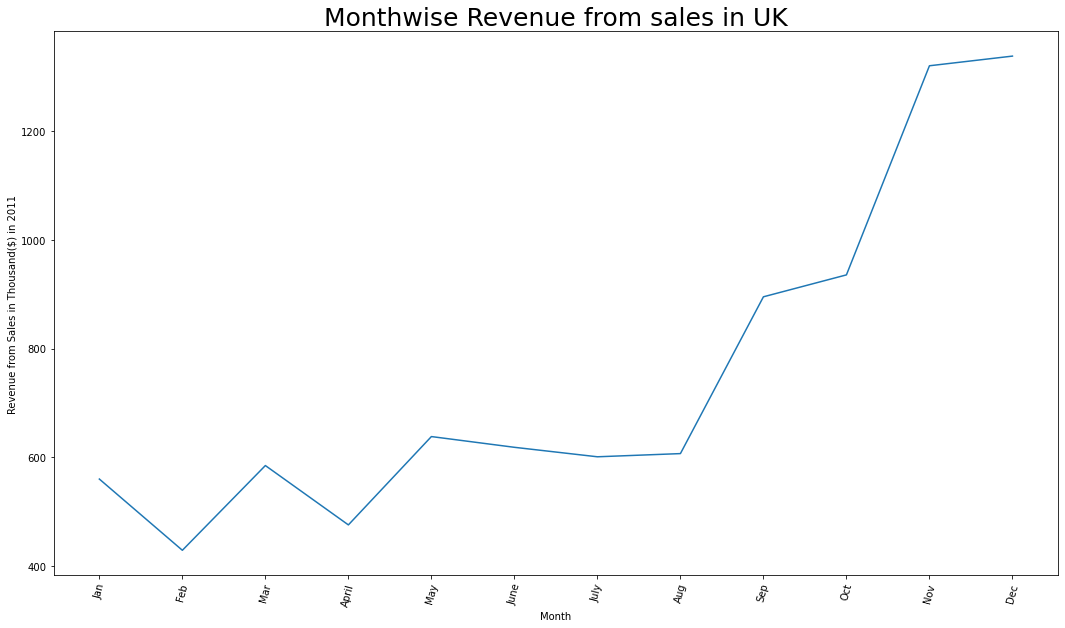

In [41]:
df_UKrev=df[df['Country']=='United Kingdom']
df_UKrev=df_UKrev[df_UKrev['InvoiceYY']!='2010']
plt.figure(figsize=(18,10))
B=pd.DataFrame(df_UKrev.groupby('month')['Revenue'].sum()).reset_index()
B['Revenue']=(B['Revenue'].astype(float)/1000).round(2)
B['month']=B['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})
ax=sns.lineplot(data=B, y='Revenue', x='month')
plt.xlabel("Month")
plt.ylabel("Revenue from Sales in Thousand($) in 2011")
plt.xticks(rotation=75)
plt.title('Monthwise Revenue from sales in UK', fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

# Observation- Revenue  was highest in November month and lowest in February month

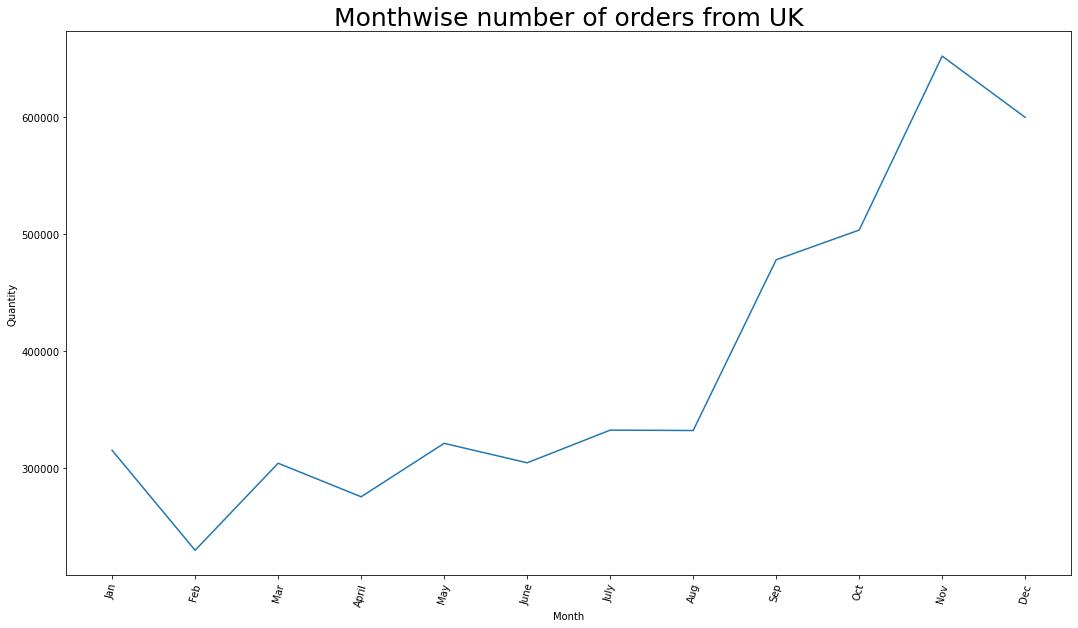

In [42]:
df_UKquant=df[df['Country']=='United Kingdom']
df_UKquant=df_UKquant[df_UKquant['InvoiceYY']!='2010']
plt.figure(figsize=(18,10))
C=pd.DataFrame(df_UKquant.groupby('month')['Quantity'].sum()).reset_index()
C['month']=C['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})
ax=sns.lineplot(data=C, y='Quantity', x='month')
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.xticks(rotation=75)
plt.title('Monthwise number of orders from UK', fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

## Observation - Quantities purchased was highest in November month and lowest in February month

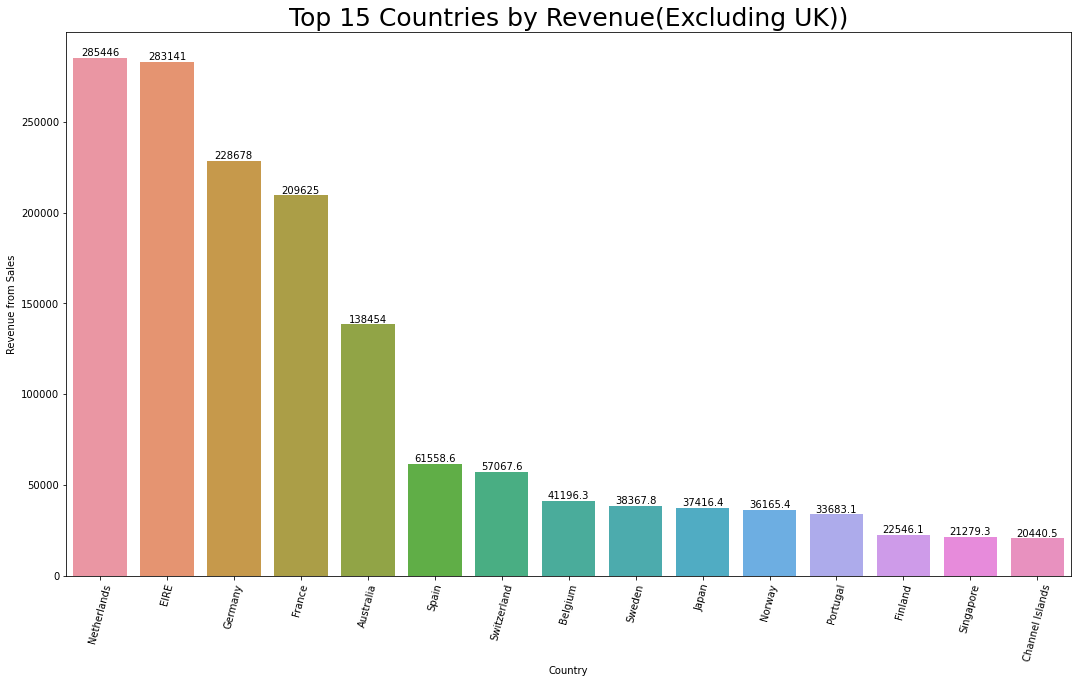

In [43]:
df_OtherRev=df[df['Country']!='United Kingdom']
plt.figure(figsize=(18,10))
A=pd.DataFrame(df_OtherRev.groupby('Country')['Revenue'].sum()).reset_index()
A=A.sort_values(by=['Revenue'], ascending=False)
ax=sns.barplot(data=A.head(15), y='Revenue', x='Country')
plt.xlabel("Country")
plt.ylabel("Revenue from Sales")
plt.xticks(rotation=75)
plt.title("Top 15 Countries by Revenue(Excluding UK))", fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

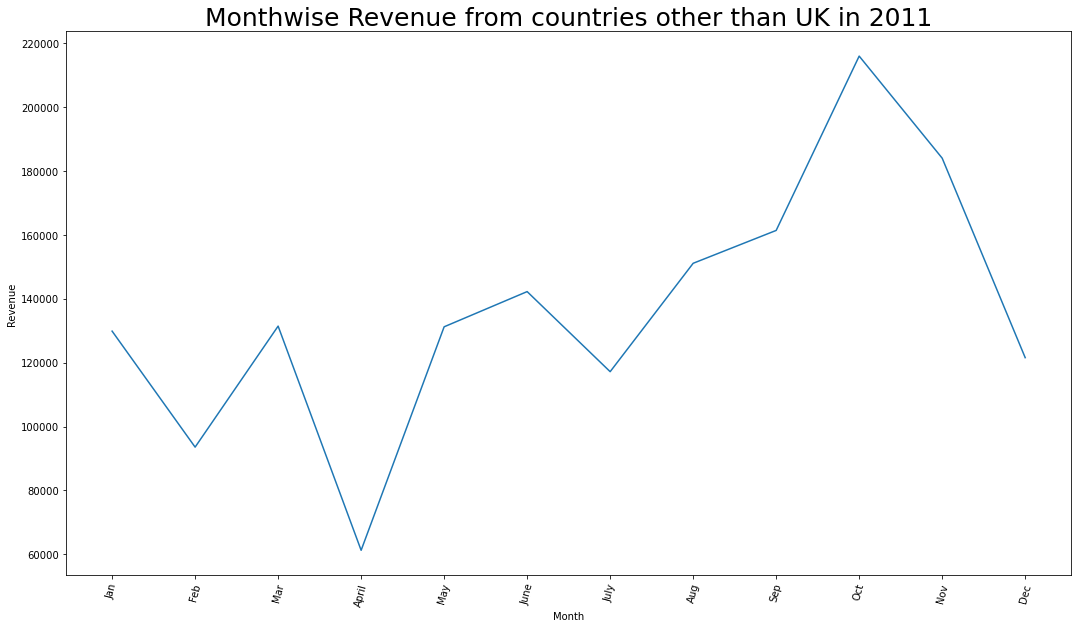

In [44]:
df_OtherRM=df[df['Country']!='United Kingdom']
df_OtherRM=df_OtherRM[df_OtherRM['InvoiceYY']!='2010']
plt.figure(figsize=(18,10))
RM=pd.DataFrame(df_OtherRM.groupby('month')['Revenue'].sum()).reset_index()
RM['month']=RM['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})
ax=sns.lineplot(data=RM.head(15), y='Revenue', x='month')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=75)
plt.title('Monthwise Revenue from countries other than UK in 2011', fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

## Observation- Revenue was highest in October month and lowest in April month

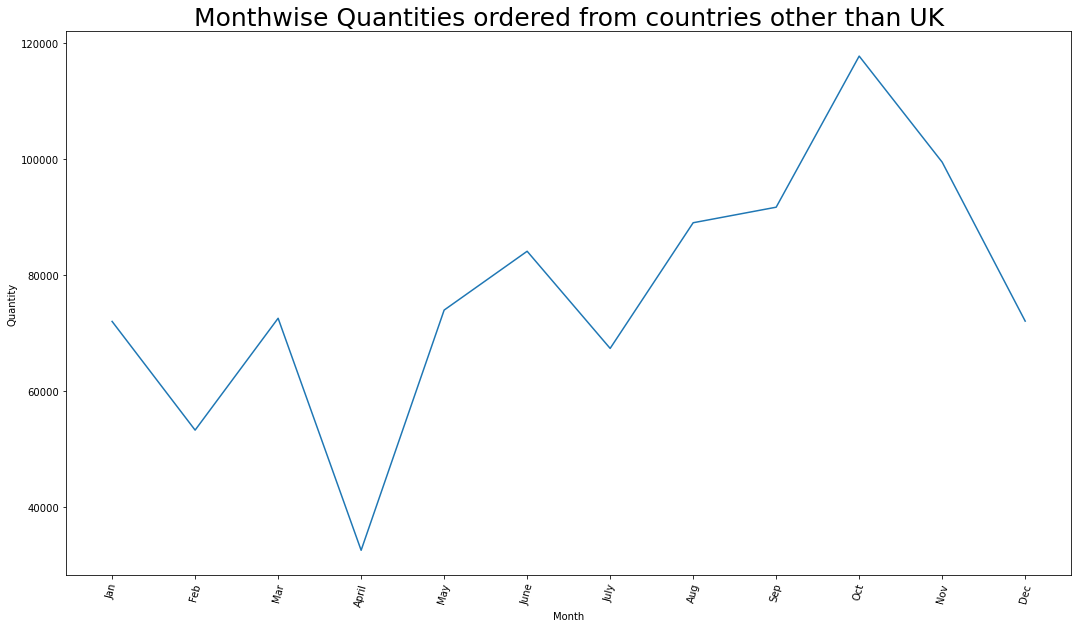

In [45]:
df_OtherQ=df[df['Country']!='United Kingdom']
df_OtherQ=df_OtherQ[df_OtherQ['InvoiceYY']!='2010']
plt.figure(figsize=(18,10))
Q=pd.DataFrame(df_OtherQ.groupby('month')['Quantity'].sum()).reset_index()
Q['month']=Q['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})
ax=sns.lineplot(data=Q.head(15), y='Quantity', x='month')
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.xticks(rotation=75)
plt.title('Monthwise Quantities ordered from countries other than UK', fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

## Observation - Quantities purchased was highest in October month and lowest in April month

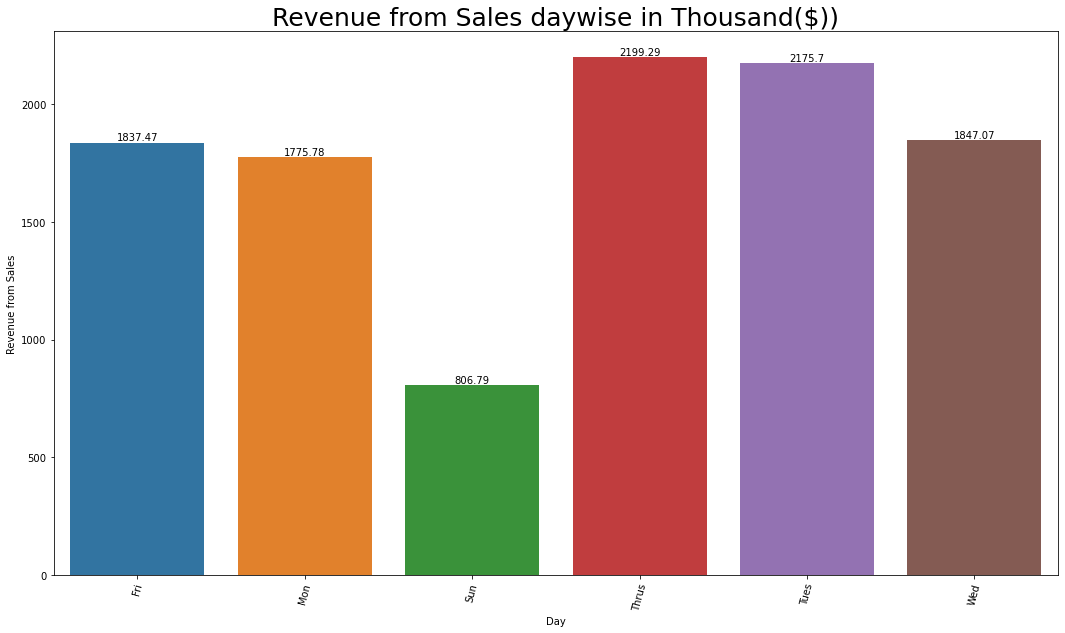

In [46]:
plt.figure(figsize=(18,10))
D=pd.DataFrame(df.groupby('Day')['Revenue'].sum()).reset_index()
D['Revenue']=(D['Revenue'].astype(float)/1000).round(2)
ax=sns.barplot(data=D, y='Revenue', x='Day')
plt.xlabel("Day")
plt.ylabel("Revenue from Sales")
plt.xticks(rotation=75)
plt.title("Revenue from Sales daywise in Thousand($))", fontsize = 25)
for i in ax.containers:
    ax.bar_label(i,)

# Observation - Sale was highest in Thrusday and Lowest in Sunday 

In [47]:
df.isnull().sum()

InvoiceNo                    0
StockCode                    0
Description                  0
Quantity                     0
InvoiceDate                  0
UnitPrice                    0
CustomerID              132186
Country                      0
Revenue                      0
Revenue in Thousands         0
month                        0
monthC                       0
Day                          0
InvoiceYY                    0
Time                         0
dtype: int64

### CustomerID has null values. We will remove it in the next step 

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Revenue                 0
Revenue in Thousands    0
month                   0
monthC                  0
Day                     0
InvoiceYY               0
Time                    0
dtype: int64

In [50]:
print('Shape of the dataset after dropping NULL values in the CustomberID column:',df.shape)

Shape of the dataset after dropping NULL values in the CustomberID column: (392692, 15)


In [51]:
df.to_excel('UK_Retail.xlsx')

In [52]:
df_ProductCount=df['Description'].value_counts()
df_Top15Products=pd.DataFrame(df_ProductCount.head(15))
df_Top15Products=df_Top15Products.reset_index().rename(columns={'index':'Products', 'Description':'Count'})
df_Top15Products.to_excel('Top15Products.xlsx')

# Cohort Analysis

### Cohort analysis is a subset of behavioral analytics that breaks them into related groups for analysis rather than looking at all users as one unit.

In [53]:
df_c=df[['CustomerID','InvoiceNo','InvoiceDate', 'Revenue', 'month']]
df_c.head(5)

,CustomerID,InvoiceNo,InvoiceDate,Revenue,month
0,17850.0,536365,2010-12-01 08:26:00,15.30,12
1,17850.0,536365,2010-12-01 08:26:00,20.34,12
2,17850.0,536365,2010-12-01 08:26:00,22.00,12
3,17850.0,536365,2010-12-01 08:26:00,20.34,12
4,17850.0,536365,2010-12-01 08:26:00,20.34,12


### 'CohortMonth' is the time(month) when the customers made their first purchase.

In [54]:
df_c['InvoiceYYMMDD']=df_c.InvoiceDate.dt.date
df_c_new=df_c.groupby(['CustomerID'])['InvoiceYYMMDD'].min().reset_index()
df_c_new['CohortMonth']=df_c_new.InvoiceYYMMDD.apply(lambda dt: dt.replace(day=1))
df_c_new.drop(['InvoiceYYMMDD'],axis=1,inplace=True)
df_c_new

C:\Users\navee\AppData\Local\Temp\ipykernel_1540\720114902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['InvoiceYYMMDD']=df_c.InvoiceDate.dt.date


,CustomerID,CohortMonth
0,12346.0,2011-01-01
1,12347.0,2010-12-01
2,12348.0,2010-12-01
3,12349.0,2011-11-01
4,12350.0,2011-02-01
...,...,...
4333,18280.0,2011-03-01
4334,18281.0,2011-06-01
4335,18282.0,2011-08-01
4336,18283.0,2011-01-01


In [55]:
df_cohort=pd.merge(df_c,df_c_new,on='CustomerID')
df_cohort['InvoiceYYMMDD']=pd.to_datetime(df_cohort['InvoiceYYMMDD'])
df_cohort['CohortMonth']=pd.to_datetime(df_cohort['CohortMonth'])
df_cohort.dtypes

CustomerID              float64
InvoiceNo                object
InvoiceDate      datetime64[ns]
Revenue                 float64
month                     int64
InvoiceYYMMDD    datetime64[ns]
CohortMonth      datetime64[ns]
dtype: object

In [56]:
df_cohort.head(5)

,CustomerID,InvoiceNo,InvoiceDate,Revenue,month,InvoiceYYMMDD,CohortMonth
0,17850.0,536365,2010-12-01 08:26:00,15.30,12,2010-12-01,2010-12-01
1,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01
2,17850.0,536365,2010-12-01 08:26:00,22.00,12,2010-12-01,2010-12-01
3,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01
4,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01


In [57]:
def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month)+1)

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceYYMMDD'], df_cohort['CohortMonth'])

In [58]:
df_cohort


,CustomerID,InvoiceNo,InvoiceDate,Revenue,month,InvoiceYYMMDD,CohortMonth,CohortPeriod
0,17850.0,536365,2010-12-01 08:26:00,15.30,12,2010-12-01,2010-12-01,1
1,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01,1
2,17850.0,536365,2010-12-01 08:26:00,22.00,12,2010-12-01,2010-12-01,1
3,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01,1
4,17850.0,536365,2010-12-01 08:26:00,20.34,12,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...
392687,12713.0,581578,2011-12-09 12:16:00,15.00,12,2011-12-09,2011-12-01,1
392688,12713.0,581578,2011-12-09 12:16:00,10.20,12,2011-12-09,2011-12-01,1
392689,12713.0,581578,2011-12-09 12:16:00,10.20,12,2011-12-09,2011-12-01,1
392690,12713.0,581578,2011-12-09 12:16:00,24.96,12,2011-12-09,2011-12-01,1


In [59]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='CustomerID', aggfunc='nunique')
customer_cohort

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Customer retention rate is the percentage of existing customers who remain customers after a given period. 

In [60]:
cohort_size = customer_cohort.iloc[:,0]
retention = customer_cohort.divide(cohort_size,axis=0) 
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


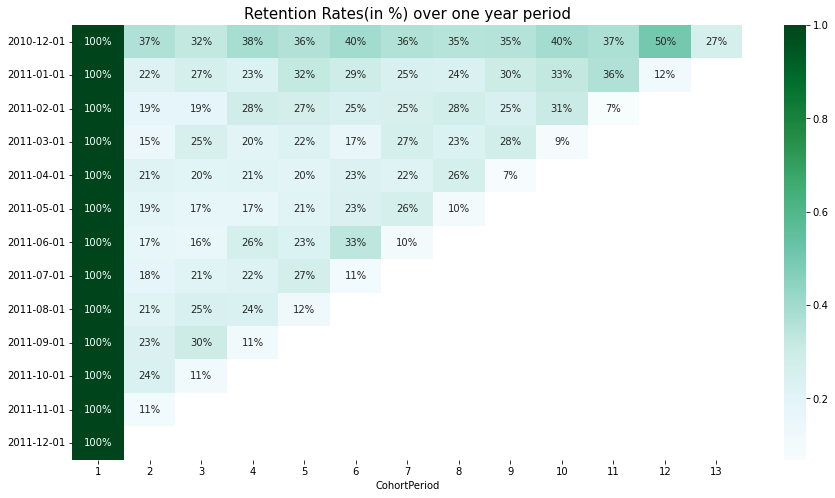

In [61]:
plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="BuGn")
plt.show()

In [62]:
# Each cohort revenue per month
Revenue_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Revenue', aggfunc='mean').round(2)
Revenue_cohort

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,22.22,27.27,26.86,27.19,21.19,28.14,28.34,27.43,29.25,33.47,33.99,23.64,25.84
2011-01-01,26.88,25.10,20.97,31.23,22.48,26.28,25.24,25.49,19.07,22.33,19.73,19.78,NaN
2011-02-01,17.87,20.85,21.46,19.36,17.69,16.98,22.17,22.90,18.79,22.18,23.50,NaN,NaN
2011-03-01,17.59,21.14,22.69,18.02,21.11,19.00,22.03,19.99,16.81,13.20,NaN,NaN,NaN
2011-04-01,16.95,21.03,19.49,18.74,19.55,15.00,15.25,15.97,12.34,NaN,NaN,NaN,NaN
2011-05-01,20.48,17.34,22.25,20.90,18.59,14.12,17.02,234.53,NaN,NaN,NaN,NaN,NaN
2011-06-01,23.98,16.29,19.95,20.45,15.35,16.71,13.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,14.96,23.53,11.79,13.02,10.88,11.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,16.52,13.16,12.53,15.88,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


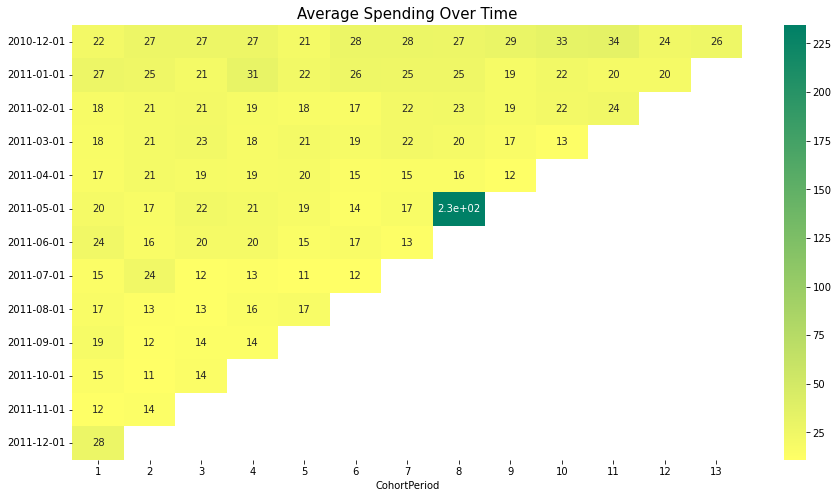

In [63]:
Revenue_cohort.index = pd.to_datetime(Revenue_cohort.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = Revenue_cohort, annot = True, cmap="summer_r")
plt.show()

# RFM analysis

In [64]:
#Last_Transaction_date
print("Last_Transaction_date =",df['InvoiceDate'].max())
print("-----------------------------------")


Last_Transaction_date = 2011-12-09 12:50:00
-----------------------------------


In [65]:
#Reference Date
import datetime as dt
Reference_Date=(df['InvoiceDate'].max()+ dt.timedelta(days=1)).date()
print("Reference_Date =", Reference_Date)

Reference_Date = 2011-12-10


In [66]:
#Recency is how recent the customer has purchased
df_r=df_cohort[['CustomerID','InvoiceNo','InvoiceDate', 'Revenue', 'month', 'InvoiceYYMMDD']]
df_R=df_r.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
df_R['InvoiceDate']=df_R['InvoiceDate'].dt.date
df_R['Recency']=df_R['InvoiceDate'].apply(lambda x: (Reference_Date - x).days)
df_R.drop(['InvoiceDate'],axis=1,inplace=True)
df_R

,CustomerID,Recency
0,12346.0,326
1,12347.0,3
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4333,18280.0,278
4334,18281.0,181
4335,18282.0,8
4336,18283.0,4


In [67]:
#Frequency is how Frequent the customer has visited the store
df_fr=df_cohort[['CustomerID','InvoiceNo','InvoiceDate', 'Revenue', 'month', 'InvoiceYYMMDD']]
df_F=df_fr.groupby(['CustomerID'])['InvoiceDate'].count().reset_index()
df_F=df_F.rename(columns={'InvoiceDate':'Frequency'})
df_F

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [68]:
# MonetaryValue is total amount of all purchases of the customer from the store
df_m=df_cohort[['CustomerID','InvoiceNo','InvoiceDate', 'Revenue', 'month', 'InvoiceYYMMDD']]
df_M=df_m.groupby(['CustomerID'])['Revenue'].sum().reset_index()
df_M=df_M.rename(columns={'Revenue':'MonetaryValue'})
df_M

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [69]:
df_RFM=pd.merge(pd.merge(df_R,df_F,on='CustomerID'),df_M, on='CustomerID')
df_RFM.head(10)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
5,12352.0,37,85,2506.04
6,12353.0,205,4,89.00
7,12354.0,233,58,1079.40
8,12355.0,215,13,459.40
9,12356.0,23,59,2811.43


In [70]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4338 non-null   float64
 1   Recency        4338 non-null   int64  
 2   Frequency      4338 non-null   int64  
 3   MonetaryValue  4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 169.5 KB


In [71]:
df_RFM.describe()

,CustomerID,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,93.059474,90.523744,2048.688081
std,1721.808492,100.012264,225.506968,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,17.000000,306.482500
50%,15299.500000,51.000000,41.000000,668.570000
75%,16778.750000,142.750000,98.000000,1660.597500
max,18287.000000,374.000000,7676.000000,280206.020000


# Build RFM Segment and RFM Score



In [72]:
r_labels =[5,4,3,2,1]
f_labels=[1,2,3,4,5]
m_labels=[1,2,3,4,5]
r_quartiles = pd.qcut(df_RFM['Recency'], q=5, labels = r_labels)
f_quartiles = pd.qcut(df_RFM['Frequency'],q=5, labels = f_labels)
m_quartiles = pd.qcut(df_RFM['MonetaryValue'],q=5,labels = m_labels)
df_RFM = df_RFM.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score

df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM["RFM_Segment"] = df_RFM['R'].astype(str) + df_RFM["F"].astype(str) + df_RFM["M"].astype(str)
df_RFM.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment
0,12346.0,326,1,77183.60,1,1,5,7,115
1,12347.0,3,182,4310.00,5,5,5,15,555
2,12348.0,76,31,1797.24,2,3,4,9,234
3,12349.0,19,73,1757.55,4,4,4,12,444
4,12350.0,311,17,334.40,1,2,2,5,122
5,12352.0,37,85,2506.04,3,4,5,12,345
6,12353.0,205,4,89.00,1,1,1,3,111
7,12354.0,233,58,1079.40,1,4,4,9,144
8,12355.0,215,13,459.40,1,1,2,4,112
9,12356.0,23,59,2811.43,4,4,5,13,445


In [73]:
df_RFM.groupby(['RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Number of Customers'})

,RFM_Score,Number of Customers
0,3,270
1,4,264
2,5,369
3,6,385
4,7,381
5,8,369
6,9,359
7,10,345
8,11,340
9,12,333


In [74]:
df_RFM.groupby(['RFM_Segment'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Number of Customers'}).sort_values(by='Number of Customers', ascending=False).head(5)

,RFM_Segment,Number of Customers
117,555,306
0,111,270
93,455,164
6,122,149
24,211,127


In [75]:
df_RFM['Customer_Category'] = pd.qcut(df_RFM['RFM_Score'], q=4, labels=['Bronze','Silver','Gold','Platinum'])

In [76]:
df_RFM

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Segment,Customer_Category
0,12346.0,326,1,77183.60,1,1,5,7,115,Silver
1,12347.0,3,182,4310.00,5,5,5,15,555,Platinum
2,12348.0,76,31,1797.24,2,3,4,9,234,Silver
3,12349.0,19,73,1757.55,4,4,4,12,444,Gold
4,12350.0,311,17,334.40,1,2,2,5,122,Bronze
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,10,180.60,1,1,1,3,111,Bronze
4334,18281.0,181,7,80.82,1,1,1,3,111,Bronze
4335,18282.0,8,12,178.05,5,1,1,7,511,Silver
4336,18283.0,4,721,2045.53,5,5,4,14,554,Platinum


In [77]:
df_RFM.groupby(['RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Number of Customers'}).to_excel('RFM_ScoreBin.xlsx')

In [78]:
df_RFM.groupby(['Customer_Category'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Number of Customers'}).sort_values(by='Number of Customers', ascending=False).head(5)

,Customer_Category,Number of Customers
0,Bronze,1288
1,Silver,1109
2,Gold,1018
3,Platinum,923


# K Means clustering

### Data Processing

In [79]:
df_DP=df_RFM[['Recency','Frequency', 'MonetaryValue']]
df_DP

,Recency,Frequency,MonetaryValue
0,326,1,77183.60
1,3,182,4310.00
2,76,31,1797.24
3,19,73,1757.55
4,311,17,334.40
...,...,...,...
4333,278,10,180.60
4334,181,7,80.82
4335,8,12,178.05
4336,4,721,2045.53


In [80]:
df_DP.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,93.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.750000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

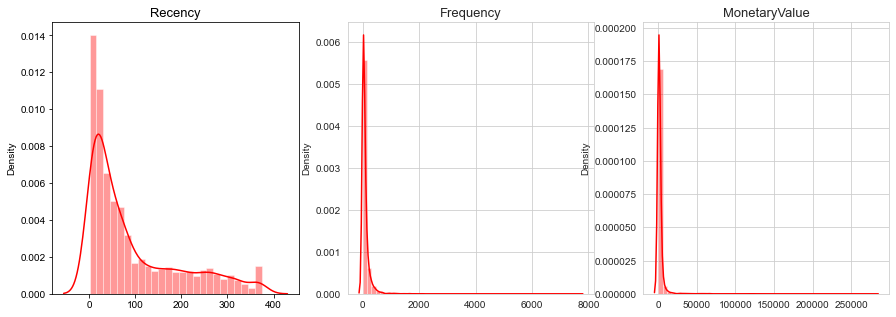

In [81]:
column = ['Recency','Frequency','MonetaryValue']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.set_style('whitegrid')
    sns.distplot(df_DP[j], color='red')
    plt.xlabel('')
    plt.title('{}'.format(j), size=13)
plt.show()

In [82]:
df_DP_Normal= df_DP[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)
df_DP_Normal.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.801030,3.671506,6.585709
std,1.383629,1.320852,1.261764
min,0.000000,0.000000,1.322000
25%,2.890000,2.833000,5.725000
50%,3.932000,3.714000,6.505000
75%,4.961250,4.585000,7.414750
max,5.924000,8.946000,12.543000


In [83]:
df_DP_Normal.skew()

Recency         -0.467283
Frequency       -0.218002
MonetaryValue    0.384054
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

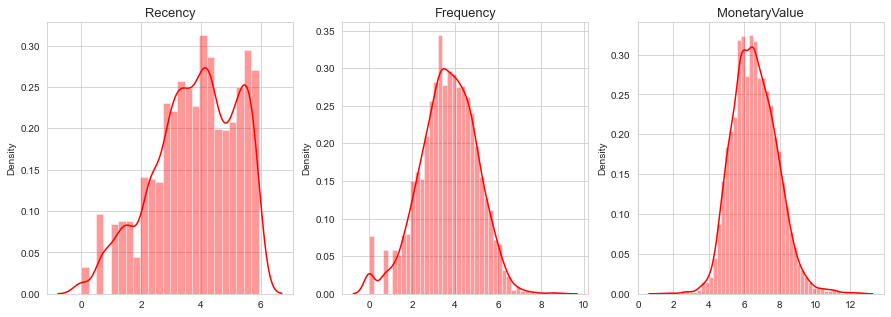

In [84]:
column = ['Recency','Frequency','MonetaryValue']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.set_style('whitegrid')
    sns.distplot(df_DP_Normal[j], color='red')
    plt.xlabel('')
    plt.title('{}'.format(j), size=13)
plt.show()

## Scaling the data

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_DP_Normal)
#Store it separately for clustering
df_DP_final= scaler.transform(df_DP_Normal)
df_Scaled_final=df_DP_final

In [86]:
df_Scaled=pd.DataFrame(df_DP_final)
df_Scaled=df_Scaled.describe().round(5).rename(columns={0:'Recency', 1:'Frequency', 2:'MonetaryValue'})

# Kmeans Algorithm

In [87]:
from sklearn.cluster import KMeans

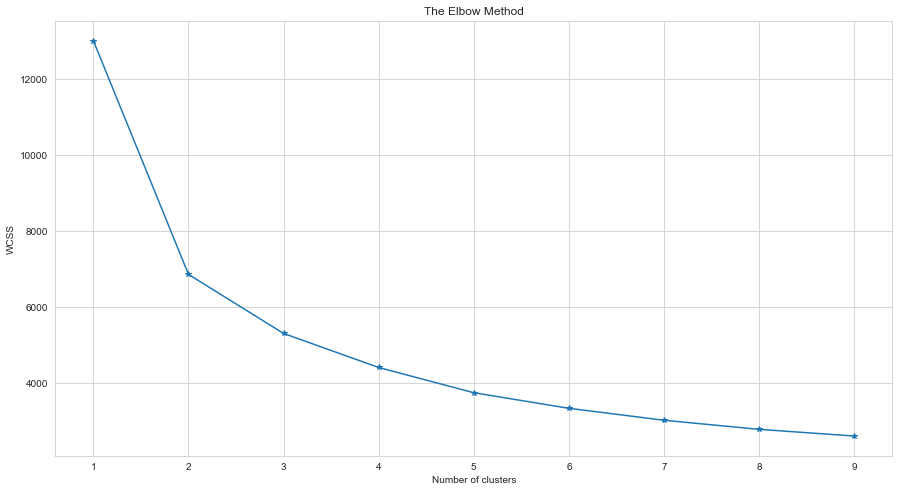

In [88]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_Scaled_final)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

In [89]:
a=pd.DataFrame(wcss).round(2).reset_index().rename(columns={0:'Error/loss'})
b=pd.DataFrame(range(1, 10)).reset_index().rename(columns={0:'Number of clusters'})
Error_K=pd.merge(b,a,on='index').drop('index', axis=1)
Error_K.to_excel('Error_K.xlsx')
Error_K

,Number of clusters,Error/loss
0,1,13014.00
1,2,6863.78
2,3,5308.84
3,4,4413.05
4,5,3748.84
5,6,3338.85
6,7,3024.53
7,8,2785.02
8,9,2609.28


In [90]:
a=pd.DataFrame(wcss)
a.reset_index()

,index,0
0,0,13014.000000
1,1,6863.776067
2,2,5308.840115
3,3,4413.049978
4,4,3748.836475
5,5,3338.851440
6,6,3024.527420
7,7,2785.020828
8,8,2609.279459


In [91]:
kc = KMeans(n_clusters= 4, random_state=1)
kc.fit(df_Scaled_final)


#Calculate average RFM values and size for each cluster:
df_RFM['Cluster']= kc.labels_
df_RFM[['Recency', 'Frequency', 'MonetaryValue', 'Cluster']]

,Recency,Frequency,MonetaryValue,Cluster
0,326,1,77183.60,3
1,3,182,4310.00,2
2,76,31,1797.24,3
3,19,73,1757.55,2
4,311,17,334.40,1
...,...,...,...,...
4333,278,10,180.60,1
4334,181,7,80.82,1
4335,8,12,178.05,0
4336,4,721,2045.53,2


In [92]:
A=df_RFM.groupby(['Cluster'])[['Recency', 'Frequency', 'MonetaryValue']].mean().reset_index().rename(columns={'Recency':'Recency Mean', 'Frequency':'Frequency Mean', 'MonetaryValue':'MonetaryValue Mean'})
A

,Cluster,Recency Mean,Frequency Mean,MonetaryValue Mean
0,0,20.210938,41.824777,643.195794
1,1,182.395383,14.153388,283.080887
2,2,13.931034,278.826437,7059.202425
3,3,104.561432,76.183889,1455.835413


In [93]:
B=pd.DataFrame(df_RFM['Cluster'].value_counts()).reset_index().rename(columns={'index':'Cluster', 'Cluster':'Count'})
B

,Cluster,Count
0,1,1343
1,3,1229
2,0,896
3,2,870


In [95]:
df_HM=df_RFM[['R', 'F', 'M', 'Cluster']]
df_HM.to_excel('HM.xlsx')

In [96]:
df_Scaled_final

array([[ 1.43549972, -2.77997064,  3.70023933],
       [-1.95308247,  1.16036535,  1.41349442],
       [ 0.38307317, -0.17983348,  0.71994094],
       ...,
       [-1.24471845, -0.89839206, -1.11262551],
       [-1.74563301,  2.20299461,  0.82219054],
       [-0.02893448,  0.43650655,  0.73737886]])

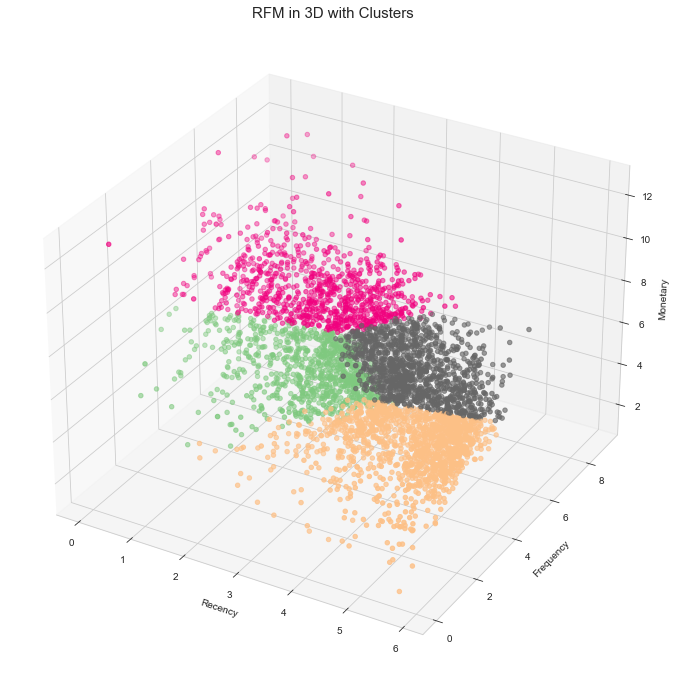

In [97]:
# Creating figure
fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_DP_Normal['Recency'], df_DP_Normal['Frequency'], df_DP_Normal['MonetaryValue'], c=df_RFM['Cluster'], cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()

In [98]:
# Silhouette analysis to Validate the choosen number of clusters(K=4)
from sklearn.metrics import silhouette_score

for num_clusters in list(range(2,8)):
    km= KMeans(n_clusters = num_clusters, max_iter=50)
    km.fit(df_Scaled)
    
    silhouette_avg = silhouette_score(df_Scaled, km.labels_, metric='euclidean')
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8745185726264272
For n_clusters=3, the silhouette score is 0.4346878655238252
For n_clusters=4, the silhouette score is 0.4509083485978877
For n_clusters=5, the silhouette score is 0.3956699240952075
For n_clusters=6, the silhouette score is 0.3899248261885374
For n_clusters=7, the silhouette score is 0.22443252771597633


### Number of clusters (K=4) has high silhouette score when compared to 3, 5 and 6. Thus validating the fact choosen k=4 is ideal number of clusters.

In [99]:
#Avergae values of three factors Frequency, Recency and Monetary values in the three cluster gives idea about the behaviour of customers in this clusters.
pd.merge(A,B,on='Cluster')

,Cluster,Recency Mean,Frequency Mean,MonetaryValue Mean,Count
0,0,20.210938,41.824777,643.195794,896
1,1,182.395383,14.153388,283.080887,1343
2,2,13.931034,278.826437,7059.202425,870
3,3,104.561432,76.183889,1455.835413,1229


COMMENT:

The 'CLUSTER 2' belongs to the "Platinum" Customers segment as they purchase recently (R), and frequency is also high,and spent the most.

The 'CLUSTER 3' can be interpreted as "Gold" customers as their frequency is high, and spent the most, recency factor is not good. Company has to come up with new strategies (like offers) to make them permanent members.

The 'CLUSTER 0' can be interpreted as "Silver" Customers as they have purchased recently (R), and have spent a decent amount of money though they are not frequenct.

The 'CLUSTER 1' belogns to "Bronze Customers" as all the three factors are not favourable.